<a href="https://colab.research.google.com/github/liordanon/Poincare-Disk-Model-Tutorial/blob/master/Poincare-Disk-Model-Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Coding Mathematical Constructs for Presentation
import cmath
import math
import scipy.integrate as integrate

class FractionalLinearTransform(object):
  def __init__(self, a, b, c, d):
    self.a = a
    self.b = b
    self.c = c
    self.d = d
  def __call__(self, z):
    return (self.a*z + self.b)/(self.c*z + self.d)

class AutoMorphism(object):
  def __init__(self, a, theta = 0.0):
    self.a = a
    self.theta = theta
  
  def __call__(self, z):
    return cmath.exp(1j*self.theta)*(z - self.a)/(1 - self.a.conjugate()*z)
  
  def Derivative(self):
    return lambda z : cmath.exp(1j*self.theta)*(1 - abs(self.a)**2)/((1 - self.a.conjugate()*z)**2)

def cross_ratio(z1, z2, z3, z4):
  return (z2 - z1)*(z3 - z4)/((z2 - z4)*(z3 - z1))
  
class Metric_(object):
    pass

class Euclidean(Metric_):
  def __call__(self, z1, z2):
    return abs(z1 - z2)

class Poincare(Metric_):
  def __call__(self, z1, z2):
    return math.atanh(abs((z2 - z1)/(1 - z1.conjugate()*z2)))

class Curve(object):
  def __init__(self,func, der):
    self.func = func
    self.der = der
    self.alpha = lambda t: abs(self.der(t))/(1 - abs(self.func(t))**2)    
  
  def length(self):
    return integrate.quad(self.alpha, 0.0, 1.0)[0]

class PHI(object):
  def __init__(self, z, w, u, v):
    self.z = z
    self.w = w
    self.u = u
    self.v = v

  def __call__(self, t):
    Metric = Poincare()

    return Metric((1 - t)*self.z + t*self.u, (1 - t)*self.w + t*self.v)
  
  def Derivative(self):
    epsilon = 10**(-11)
    return lambda t : (self(t + epsilon) - self(t))/epsilon

def Get_Circle(u, v):
  u1, u2 = u.real, u.imag
  v1, v2 = v.real, v.imag

  C1 = (u2*(v1**2 + v2**2) - v2*(u1**2 + u2**2) + u2 - v2)/(u1*v2 - u2*v1)
  C2 = (v1*(u1**2 + u2**2) - u1*(v1**2 + v2**2) + v1 - u1)/(u1*v2 - u2*v1)

  return C1, C2


#**Hyperbolic Geometry and Metrics intro**

##**Hyperbolic Geometry Basics**



In mathematics, a metric or distance function is a function that defines a distance between each pair of elements of a set.

<br><br>
such a function can be constructed using a cross ratio which is denoted thusly ${\displaystyle (z_{1},z_{2};z_{3},z_{4})={\frac {(z_{2}-z_{1})(z_{3}-z_{4})}{(z_{2}-z_{4})(z_{3}-z_{1})}}.}$
<br><br>

One important result of this definition is that the cross ratio is invariant under a fractional linear transformation and thus also under an auto morphism (on the unit disk).
<br><br>
The cross ratio of 4 complex numbers on a circle is used for hyperbolic metrics (discussed shortly) since being on a circle means the four points are the image of four real points under a mobius transformation and so the cross ratio is a real number




In [0]:
F = FractionalLinearTransform(0.1 + 0.4j, 0.2 + 0.8j, 0.3, 0.4)

z1 = 0.1 + 0.2j
z2 = 0.2 + 0.3j
z3 = 0.5 - 0.05j
z4 = 0.4 + 0.2j


cr1 = cross_ratio(z1, z2, z3, z4) 
cr2 = cross_ratio(F(z1), F(z2), F(z3), F(z4))



# very low error (yet non-zero because of rounding errors in compution)
print('{} = {}'.format(cr1, cr2)) 



(-0.29438202247191014-0.2089887640449436j) = (-0.29438202247191303-0.2089887640449461j)


## **What is A Metric ?**

A metric on a set X is a function (called the distance function or simply distance)

$
{\displaystyle d:X\times X\to [0,\infty )}$,
where ${\displaystyle [0,\infty )}$ is the set of non-negative real numbers and for all ${\displaystyle x,y,z\in X} $, the following conditions are satisfied:

(i).	${\displaystyle d(x,y)\geq 0} $	non-negativity or separation axiom.
<br>
(ii).	${\displaystyle d(x,y)=0\Leftrightarrow x=y} $	identity of indiscernibles.
<br>
(iii).	${\displaystyle d(x,y)=d(y,x)} $	symmetry.
<br>
(iv).	${\displaystyle d(x,z)\leq d(x,y)+d(y,z)} $	subadditivity or triangle inequality.


##**Defining The Poincare Metric**



In order for a metric to be useful to us we would want it to have a couple of important properties namely :

(i) $for\space each\space F ∈ Aut(∆), \space and \space each \space pair  \space z,w \space in \space ∆ \space :\space ρ(F(z), F(w)) = ρ(z,w)$


(ii) $for\space each\space pair \space s, t ∈ (0, 1),\space s<t\space:\space
                                      ρ(0, t) = ρ(0, s) + ρ(s, t)$
                                      
                                      
(iii) $lim_{t→0+}\frac{ρ(0, t)}{t} = 1$


After requiring this properties it is simple to show that ρ has to be of the form 
ρ(z,w) = $\frac{−1}{2} log(z`, z, w, w`)$= $ \frac{1}{2}log(\frac{1 + |m_{−z}(w)|}{1 − |m_{−z}(w)|.}) $  

where  $m_{−z}(ξ)=(ξ − z)(1 − z\bar{ξ} )^{−1}$
and $z`$,  $z$, $w$, $w`$ are complex numbers on a circle with $z`\space and\space w`$ being on the intersection of the circle with $∂Δ$ and z, w on the circle and in $Δ$ by order. [Proof 1]
<br><br>

and from that we define the poincare metric on the unit disk: **$ρ(z_1,z_2)=\tanh^{-1}\left|\frac{z_1-z_2}{1-\bar{z_1}z_2}\right| $**

Let's test some of the properties we have associated with the poincare metric on the unit disk.

In [0]:
# One - invariance under automorphism
# ρ(0, t) = ρ(0, s) + ρ(s, t)
# lim t→0+ ρ(0,t)/t = 1

F = AutoMorphism(0.5 + 0.1j, math.pi/3)

Metric = Poincare()

z1 = 0.1 + 0.5j
z2 = 0.2 + 0.4j

d1 = Metric(z1, z2)
d2 = Metric(F(z1), F(z2))

print('{} = {}'.format(d1, d2))

s, t = 0.2 , 0.35

d1 = Metric(0, t)
d2 = Metric(0, s) + Metric(s, t)

print('{} = {}'.format(d1, d2))

epsilon = 10**(-20)

limit_p = Metric(0, epsilon)/epsilon

print('{} = 1'.format(limit_p))



0.18278414947337687 = 0.182784149473377
0.36544375427139614 = 0.36544375427139614
1.0 = 1


Notice the 3 properties written above seem to hold up when tested in code.
feel free to test many combinations of $z_{i}\space 's$ and Automorphisms T to be convinced.

##**Intuition About The Metric**


One thing to note about metrics like this one is that even though we have "left" the euclidean plane, it doesn't mean that we have disposed of all intuition about the space we are in.

If one is willing to embrace a few seamingly strange rules like that the shortest path between two points is not a straight line, that the sum of angles in a triangle sum to less then 180 degrees and some other somewhat strange phenomena, we can begin to understand what is going on in that space (Dont worry, at least circles are still kept circles).





#**Infinitesimal Poincare metric and geodesics**

##**infinitesimal Poincare hyperbolic metric on ∆**

Let z be any point of ∆ and u ∈ C be such that z + u ∈ ∆.
If ρ is the Poincare metric on ∆, then:

$ρ(z,z + u) = \frac{|u|}{ 1 − |z|^2} (1 + ε(u))$

where ε (u) → 0, as u → 0


To test this, let us re-write the equation as 

$ε(u) = \frac{ρ(z,z+u)( 1 − |z|^2)}{|u|} - 1$

and lets see if it ε(u) truly goes to 0 as u goes to 0

In [0]:
def Eps(z, u):
  Metric = Poincare()
  return Metric(z, z + u)*(1 - abs(z)**2)/abs(u) - 1

z = 0.1 + 0.2j
u = 0.5 + 0.3j

n = 15
for i in range(n):
  print('iteration {:2} epsilon is {}'.format(i , Eps(z, u)))
  u /= 2

iteration  0 epsilon is 0.38701635436187054
iteration  1 epsilon is 0.10067865330665526
iteration  2 epsilon is 0.038322670070966236
iteration  3 epsilon is 0.01669902177414717
iteration  4 epsilon is 0.007780532885783176
iteration  5 epsilon is 0.0037528829206350256
iteration  6 epsilon is 0.0018426504526525278
iteration  7 epsilon is 0.0009129437317321187
iteration  8 epsilon is 0.00045438458608715315
iteration  9 epsilon is 0.00022667147323085501
iteration 10 epsilon is 0.00011320565597006116
iteration 11 epsilon is 5.657032331818357e-05
iteration 12 epsilon is 2.8277037379620396e-05
iteration 13 epsilon is 1.4136487852978163e-05
iteration 14 epsilon is 7.0677364332194514e-06


Notice how by decreasing u to zero we get that ε (u) goes to zero as well (as expected).
feel free to change the values of z and u to see that the property holds for all z, u that fit the conditions.

By the formula above we get that the linear differential element dρ_{z} in the Poincare metric is defined by the formula :

$dρ_{z} = \frac{|dz|}{ 1 − |z|^2} $

The form

$α(z, u) = \frac{|u|}{ 1 − |z|^2}$ is called the infinitesimal (or differential) Poincare hyperbolic metric on ∆.

By this definition the following two properties are directly implied:

(a) $α(z, u) ≥ 0 \space , z ∈ ∆, u ∈ \mathbb{C}.$

(b) $α(z, tu) = |t|α(z, u) \space , t ∈ \mathbb{C}.$


One important property of the infinitesimal Poincare hyperbolic metric is that If $F ∈ Hol(∆)$ then $dρ_{F (z)} ≤ dρ_{z}$ or equivalently, $α (F(z), dF(z)) ≤ α(z, dz)$. 
<br>
<br>
If $F ∈ Aut(∆)$, then the equality in the equation above holds for all z ∈ ∆. Moreover, if
the equality holds for at least one z ∈ ∆, then F ∈ Aut(∆).

Let us take some automorphism and show that this equality truly holds.

In [0]:
def alpha(z, u):
  return abs(u)/(1 - abs(z)**2)

F = AutoMorphism(0.5 + 0.1j, math.pi/3)

z = 0.1 + 0.05j
dz = 10**(-15) + 10**(-13)*1j

F_z = F(z)
F_der_z = F.Derivative()(z)

dF_z = F_der_z*dz

print('{} = {}'.format(alpha(F_z, dF_z) , alpha(z, dz)))



1.0127088594937342e-13 = 1.0127088594937342e-13


feel Free to Play with the Type of Automorphism, point z and dz  to see this holds in general.

##**Hyperbolic Length of a Curve**

In Infinatesimal Calculus 2 we have learned about line integrals and how an integral can be taken along any path.
<br>
<br>
By doing so we were able to calculate the length of a line by integrating over the length differential of the path.
<br>
<br>
the thing is that by calculating the length differential the way we did (the pythagorean theorem dl^2 = dx^2 + dy^2) we assumed that we are in a euclidean space which as we have explored throughout this Presentation is not the only metric space out there.
<br>
<br>
Hence, the same way we have defined the path differential for the euclidean metric space and calculated the lengtyh of a segment of some line by integrating over it.
<br>
<br>
we can take the linear differential element $dρ_{z}$ in the Poincare metric and integrate over it to calculate what we **define** as  the hyperbolic length of the line.
<br>
<br>
or in a rigorous manner:
Let $γ : [0, 1] → ∆$ be an admissible curve in $∆$ joining two points $z$ and $w$ in $∆$. Then the quantity 
$
Lγ(= Lγ(z,w)) = \int_{γ}{dρ_{γ(t)}} = \int_{0}^{1}\frac{|γ(t)|}{1 − |γ(t)|^2} dt
$

is called the hyperbolic length of γ

analogous to the euclidean space case, one may think of it as summing over small pieces of hyperbolic length of the line.

hence it should be no surprise that $ρ(z,w) ≤ L_{γ}(z,w)$
because in analogy to the euclidean metric space, we know that the distance between 2 point (z, w) is the length of the shortest path (a straight line) between these two points.

##**What is a Geodesic ?**


A Geodesic segment is what we understand as a "straight line" in euclidean space.

It is the distance (using the poincare metric) of the shortest path (minimal distance) between two points.
<br>
<br>
or in a more rigorous manner:

A curve $γ$ joining points $z,w$ in $∆$ is called a geodesic segment in $∆$ if its length is equal to the hyperbolic distance between its end points $z$ and $w$ , i.e., $L_{γ}(z,w) = ρ(z,w)$
<br>
<br>
One thing to note is that by the rule discussed before 
($for\space each\space pair \space s, t ∈ (0, 1),\space s<t\space:\space ρ(0, t) = ρ(0, s) + ρ(s, t)$) it is implied that s is on the geodesic from $0$ to any  point $t$,  $s < t < 1$ on  $[0, 1)$ . 


##**Geodesics on The Unit Disk in Poincare Metric Space**

And in fact, one important result about geodesics in Poincare metric space is the following:
<br><br>
For each pair $z$ and $w$ in $∆$ there is a unique geodesic segment joining $z$ and $w$ and it is either a direct segment, if $z$ and $w$ lie on a diameter of $∆$, or a segment of the circle in $\mathbb{C}$ which passes through $z$ and $w$ and is orthogonal to $∂∆$ the boundary of $∆$.
<br><br>





Let us demonstrate this by taking some curves and seeing whether this holds for them.

In [0]:
Metric = Poincare()
pi = math.pi

s, w = 0.5 + 0.4j, -0.25 - 0.2j

# A Geodesic segment from w to s where s, w on same diameter
C1 = Curve(lambda t: (s - w)*t + w,\
           lambda t: s - w)

print('{} = {}'.format(C1.length(), Metric(w, s)))


# A random path between w and s
C2 = Curve(lambda t: (s - w)*t + w + 0.05j*math.sin(pi * t),\
           lambda t: (s - w) + 0.05j*pi*math.cos(pi * t))

print('{} > {}'.format(C2.length(), Metric(w, s)))

w = 0.6173165676349104+0.07612046748871315j
s = 0.07612046748871348+0.6173165676349097j

# A Geodesic segment from w to s where s, w NOT on same diameter
C3 = Curve(lambda t: 1+1j + math.sin(pi/2 * (0.5*t+0.25) + pi) + 1j*math.cos(pi/2 * (0.5*t+0.25) + pi)\
          ,lambda t: (pi/2)*0.5*math.cos(pi/2 * (0.5*t+0.25) + pi) - (pi/2)*0.5*1j*math.sin(pi/2 * (0.5*t+0.25) + pi))
# A euclidean straight line between w and s
C4 = Curve(lambda t: (s - w)*t + w,\
           lambda t: s - w)

print('{} = {} < {}'.format(Metric(w, s), C3.length(),  C4.length()))

1.0905242482497604 = 1.0905242482497604
1.0962166721272526 > 1.0905242482497604
1.0465323920155627 = 1.0465323920155634 < 1.0810925000758327


We can see that taking some random path between this 2 points yeilded a length greater then the geodesic length between this 2 points as expected and that taking the geodesic path as described by the proposition above yeilded equal hyperbolic lengths (minus numerical computation errors).

Moreover, we can see that taking the geodesic path between points w and s yeilded a shorter length then the straight line path between them.

feel free to test out other curves $C$ and points $z$, $w$.

Here is a cell to help you visuallize the geodesics 

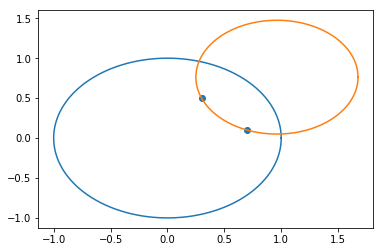

In [0]:
import numpy as np
import matplotlib.pyplot as plt

u, v = 0.3 + 0.5j, 0.7 + 0.1j

u1, u2 = u.real, u.imag
v1, v2 = v.real, v.imag

fig, ax = plt.subplots()
if (u1*v2 - u2*v1) == 0.0:

  vec = u/abs(u)
  xs = np.linspace(-1, 1, 2000)
  ax.scatter([u.real, v.real], [u.imag, v.imag])
  ax.plot(np.cos(2*np.pi*xs) , np.sin(2*np.pi*xs))
  ax.plot(vec.real*xs, vec.imag*xs)
  plt.show()

else:
  C1, C2 = Get_Circle(u, v)

  xs = np.linspace(0, 1, 1000)

  center = (-C1/2, -C2/2)
  radius = np.sqrt((u.real-center[0])**2 + (u.imag - center[1])**2)


  ax.scatter([u.real, v.real], [u.imag, v.imag])
  ax.plot(np.cos(2*np.pi*xs) , np.sin(2*np.pi*xs))
  ax.plot(center[0] + radius*np.cos(2*np.pi*xs) ,center[1] + radius*np.sin(2*np.pi*xs))
  plt.show()



#**Poincare Metric with Convexity**

## **About the convexity of the Unit Disk**


It is very intuitive and very easy to show that the unit disk is convex [Proof 2].

Knowing that the unit disk is convex, we can start exploring the metric along straight lines in Δ, since, being convex, every euclidean line between two points on Δ is contained in it.

##**teorem set 1**

Exploring the poincare metric over straight line segments, we get the following theorems.

The Poincare metric ρ on the unit disk $∆$ satisfies the following properties [PROOF 3]:
<br><br>
(i) for $z, w \in ∆$ $,z \ne w$, and $\forall k ∈ (0, 1):
ρ(kz, kw) < kp(z,w)$.
<br><br>
(ii) for $z, w$ and $u$ are three unique points in $∆$,  $\forall k ∈ (0, 1)$:
<br>
$ρ((1 − k)z + ku,(1 − k)w + ku) ≤ qρ(z,w)$,
with $q = (1 − k) + k|u| < 1$.
<br><br>
(iii) for $z, w, u$ and $v$ distinct points in $∆$, $\forall k ∈ [0, 1]$:
<br>
$ρ((1 − k)z + ku,(1 − k)w + kv) ≤ max(ρ(z,w), ρ(u,v))$.

How do we interpret this theorems ?
<br><br>
Well, the first theorem is very easy to understand, and simply states that multiplying both points by a constant $k$ beween $0$ and one reduces the hyperbolic distance by a factor smaller than $k$. 
<br><br>
The second theorem gives a maximum threshold of reduction from advancing closer to some point $u$ by a line division of $1 - k$ and $k$.
<br><br>
The third theorem simply states that taking 2 straight (euclidean) lines in the unit disk at both the same constant speed (wrt its length) the maximum hyperbolic distance is achieved at either the start of these paths or its end.

Let's see some examples in code.

In [0]:
Metric = Poincare()

k = 0.2
z, w = 0.1 + 0.2j, 0.7 - 0.3j

print('{} < {}'.format(Metric(k*z, k*w), k*Metric(z, w)))

k = 0.5
z, w = 0.1 + 0.2j, 0.7 - 0.3j

print('{} < {}'.format(Metric(k*z, k*w), k*Metric(z, w)))

k = 0.8
z, w = 0.1 + 0.2j, 0.7 - 0.3j

print('{} < {}'.format(Metric(k*z, k*w), k*Metric(z, w)))

print('-'*40)

k = 0.2
z, w = 0.1 + 0.2j, 0.7 - 0.3j
u = -0.3 + 0.5j
q = 1 - k + k*abs(u)

print('{} <= {}'.format(Metric((1-k)*z + k*u, (1-k)*w + k*u), q*Metric(z, w)))

print('-'*40)

k = 0.2
z, w = 0.1 + 0.2j, 0.7 - 0.3j
u, v = -0.3 + 0.5j, -0.3 + 0.7j

print('{} <= {}'.format(Metric((1-k)*z + k*u, (1-k)*w + k*v), max(Metric(z, w), Metric(u, v))))

0.15755475566740718 < 0.20782075145749515
0.4131409353448642 < 0.5195518786437379
0.7333459329827325 < 0.8312830058299806
----------------------------------------
0.6989750183191736 <= 0.9524622862799061
----------------------------------------
0.6709878129433696 <= 1.0391037572874757


##**rewriting the poincare metric between two equal speed paths**

for given points $z, w, u, v \in ∆$.
Using the equality $1 − |m_{−z}(w)|^2 = σ(z,w)$,
where $σ(z,w) = \frac{(1 − |z|^2)(1 − |w|^2)}{|1 − zw|^2}$ we get that $ρ(z,w) = tanh^{−1}\sqrt{1 − σ(z,w)} $.
And so defining $ψ(t) = σ ((1 − t)z + tu,(1 − t)w + tv)$ we get that $ϕ(t) = tanh^{−1}\sqrt{ 1 − ψ(t)}$

In [0]:
def rho(z, w):
  return (1 - abs(z)**2)*(1 - abs(w)**2)/abs(1 - z.conjugate()*w)**2

Poincare_2 = lambda z, w : math.atanh(math.sqrt(1 - rho(z, w)))

Metric1 = Poincare()
Metric2 = Poincare_2

z1, w1 = 0.4 + 0.3j, -0.7 + 0.1j
z2, w2 = 0.6 - 0.5j, -0.6 + 0.1j

print('{} = {}'.format(Metric1(z1, w1), Metric2(z1, w1)))
print('{} = {}'.format(Metric1(z2, w2), Metric2(z2, w2)))

1.3628742021824065 = 1.3628742021824065
1.721362393568316 = 1.721362393568316


##**theorem set 2**

For  $z, w, u ,v \in ∆$ the following statements are equivalent [Proof 4].
<br><br>
(i) the function $ϕ : [0, 1] → \mathbb{R}^{+}, ϕ(t) = ρ((1 − t)z + tu,(1 − t)w + tv)$ is not decreasing on $[0, 1]$.
<br><br>
(ii) $ϕ(0) ≤ ϕ(t)$,  $t ∈ [0, 1]$.
<br><br>
(iii) $ϕ(0_{+}) ≥ 0$
<br><br>
(iv) $Re\{\frac{
\bar{z}(z − u)}{1 − |z|^2 }+{\frac{\bar{w}(w − v)}{1 − |w|^2}}\}
≤ Re\{ \frac{\bar{z}(w − v) + w(\bar{z} − \bar{u})}{
1 − \bar{z}w} \}.
$

Let's test those theorems in code.

(a) + (b)


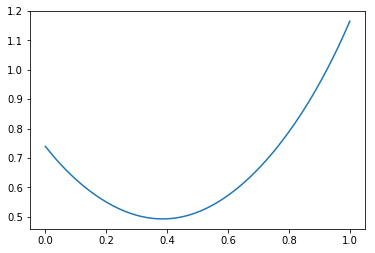

(c) derivative = -1.326494469822137 < 0
(D) 0.9145135566188195 > 0.0804243008678881
--------------------------------------------------
(a) + (b)


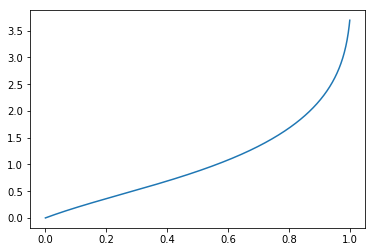

(c) derivative = 2.1175344249068857 >= 0
(D) 1.2104377104377102 <= 1.2104377104377104


In [0]:
import matplotlib.pyplot as plt
import numpy as np

z =  0.1 + 0.2j
w =  0.5 - 0.3j
u =  0.2 + 0.7j
v = -0.5 + 0.3j

F = PHI(z, w, u, v)

print('(a) + (b)')
t = np.linspace(0, 1, 1000).tolist()
F_t = list(map(F, t))
plt.figure()
plt.plot(t, F_t)
plt.show()

print('(c) derivative = {} < 0'.format(F.Derivative()(0)))

right = ((z.conjugate()*(z - u)/(1-abs(z)**2) + w.conjugate()*(w - v)/(1-abs(w)**2))).real
left = ((z.conjugate()*(w - v) + w*(z.conjugate() - u.conjugate()))/(1 - z.conjugate()*w)).real

print('(D) {} > {}'.format(right, left))

print('-'*50)

z =  0.5 - 0.3j
w =  0.5 - 0.3j
u =  0.8888888888888888+0.4444444444444444j
v = -0.5 + 0.6j

F = PHI(z, w, u, v)

print('(a) + (b)')
t = np.linspace(0, 1, 1000).tolist()
F_t = list(map(F, t))
plt.figure()
plt.plot(t, F_t)
plt.show()

print('(c) derivative = {} >= 0'.format(F.Derivative()(0)))

right = ((z.conjugate()*(z - u)/(1-abs(z)**2) + w.conjugate()*(w - v)/(1-abs(w)**2))).real
left = ((z.conjugate()*(w - v) + w*(z.conjugate() - u.conjugate()))/(1 - z.conjugate()*w)).real

print('(D) {} <= {}'.format(right, left))



      

We can see here one example for each case and it is visible that for these 2 examples the implication chain has proven to work.

feel free to test out different 4 points to see for yourself

#**PROOFS**

##**Proof 1**


$ρ(z,w) =  ρ(m_{−z}(z), m_{−z}(w)) = ρ(0,m_{−z}(w))$

since $m_{−z} ∈ Aut(∆)$.
<br>
<br>
 $r_{ϕ}(u) \equiv e^{iϕ}u, u ∈ ∆$ with $ϕ = − arg u$, we get

$ρ(0, u) = ρ(r_{ϕ}(0), r_{ϕ}(u)) = ρ(0, |u|)$.
<br>
<br>
and from this it is implied that $ρ(z,w) = ρ(0, |m_{−z}(w)|)$.

So it remains to show that  $\forall r ∈ (0, 1)$ the equation $ρ(0, r) = tanh^{−1}(r)$
<br>
<br>
for each $δ > 0$, such that $r + δ < 1$ we get using (ii) and (i) that 
<br>
<br>
$
ρ(0, r + δ) − ρ(0, r) = ρ(r, r + δ) = ρ(m_{−r}(r), m_{−r}(r +δ)) =  ρ(0, \frac{δ}{1 − rδ − r^2})
$
<br>
<br>
And so using (iii) we get:
 <br><br>
 $\frac{d^+ρ(0, r)}{dr} = \frac{d^-ρ(0, r)}{dr} = \frac{1}{1 − r^2}$
 
 $ρ(0, r) = \int_{0}^{r}\frac{ds}{1 − s2} = tanh^{−1}(r)$
<br>
<br>


##**Proof 2**

Given two points $p_{1},p_{2}∈Δ$ we want to show that any point on the line segment between them lies on $Δ$ as well.that is, that $||tp_{1}+(1−t)p_{2}||<1 \space\forall \space 0≤t≤1$.
<br><br>
By the triangle inequality we have

$||tp_{1}+(1−t)p_{2}||≤||tp_{1}||+||(1−t)p_{2}||$
<br><br>
Since $t$ and $(1−t)$ are positive, this says that

$||tp_{1}+(1−t)p_{2}||≤t||p_{1}||+(1−t)||p_{2}||$
<br><br>
Since  $p_{1},p_{2}∈Δ$, we have $||p_{1}||,||p_{2}||≤1$, so $||tp_{1}+(1−t)p_{2}||≤t*1+(1−t)*1=1$.

##**Proof 3**

. (i) If γ is the geodesics joining $z$ and $w$, then $kγ$ is an admissible curve joining $kz$ and $kw$. In addition, calculations show that:
$\frac{kγ'(t)}{1 − k^2|γ(t)|^2} = k\frac{1 − |γ(t)|^2}
{1 − k^2|γ(t)|^2} \frac{ |γ'(t)|}
{1 − |γ(t)|^2} < \frac{k |γ'(t)|}{1 − |γ(t)|^2}$
And so we have,
$ρ(kz, kw) ≤ L_{kγ} < kL_{γ} = kρ(z,w)$.
<br><br>
(ii) Consider the holomorphic mapping F on ∆ defined by:
$F(z) = (1 − k)z + ku$,
where u is a fixed element of ∆. It follows by the maximum principle that
$|F(z)| ≤ q = (1 − k) + k|u| < 1$.
Thus
$G = \frac{1}{q} \space F ∈ Hol(∆)$.
Using  assertion (i) above we obtain
$ρ(qG(z), qG(w)) = ρ(F(z), F(w)):= ρ((1 − k)z + ku,(1 − k)w + ku)< qρ(G(z), G(w)) ≤ ρ(z,w)$.
<br><br>
(iii) Suppose that
$ max(ρ(z,w), ρ(u, v)) = ρ(z,w)$
let $F$ and $G$ in $Aut(∆)$be automorphisms, such that,  $F(z) = 0$ and $G(u) = 0$, say $F = m_{−z}$ and
$G = m_{−u}$.

Denote $|F(w)| = r_{1}$ and $|G(v)| = r_{2}$ and take rotations $r_{ϕ1}$ and $r_{ϕ2}$ with
$ϕ1 = − arg F(w), ϕ2 = − arg G(v)$.
Then $F1 = r_{ϕ1} \circ F$ and $G_{1} = rϕ2 \circ G$ belong to $Aut(∆)$ and we have
$F_{1}(z)=0, F_{1}(w) = r_{1}, G_{1}(u)=0, G_{1}(v) = r_{2}$.
Then
$ρ(u, v) = ρ(G_{1}(u), G_{1}(v)) = ρ(0, r_{2})≤ ρ(F_{1}(z), F_{1}(w)) = ρ(0, r_{1})$,
and we obtain $r2 ≤ r1$.
Denoting the mapping $G^{−1}(\frac{r_{2}}{r_{1}}F)$
by $Φ$ we have $Φ ∈ Hol(∆)$ and
$Φ(z) = G^{−1}_{1}(\frac{r_{2}}{r_{1}}F_{1}(z)) = G^{-1}_{1}(0) = u$

$Φ(w) = G^{−1}_{1}(\frac{r_{2}}{r_{1}}F_{1}(w)) = G^{-1}_{1}(r_{2}) = v$

If we consider the mapping $(1 − k)I + kΦ$ which  belongs to $Hol(∆)$,
again we obtain:
$ρ(((1 − k)I + kΦ)(z),((1 − k)I + kΦ)w)
= ρ((1 − k)z + kΦ(z),(1 − k)w + kΦ(w))
= ρ((1 − k)z + ku,(1 − k)w + kv) ≤ ρ(z,w)$

##**Proof 4**

It is clear that (i) implies (ii) which, in turn, implies (iii). The equivalence (iii) and (iv) follows from the fact that 
$
ψ^{'}(0^+) = −2σ(z,w)[
Re\{\frac{
\bar{z}(z − u)}{1 − |z|^2 }+{\frac{\bar{w}(w − v)}{1 − |w|^2}}\} - Re\{ \frac{\bar{z}(w − v) + w(\bar{z} − \bar{u})}{
1 − \bar{z}w} \}] = −2µσ(z,w)
$

and 
$
ϕ(0^+) = \frac{−ψ(0^+)}
{2 \sqrt{ 1 − ψ(0) · ψ(0)}} = \frac{µ}{|m−z(w)|}
$

, because µ ≥ 0 if and only if (iv) holds.
Now, we will show that (iii) implies (i). Assume that $ϕ(0^+) > 0$. We claim that $ϕ$ is a monotone function on [0, 1]. Indeed, suppose that $ϕ$ has a local maximum,
which is achieved at the point $t_{0} ∈ (0, 1)$. Then there are two points $t_{1}$ and $t_{2} ∈ (0, 1)$ such that $t_{0} = \frac{1}{2} (t_{1} + t_{2})$ and $ϕ(t0) > max\{ϕ(t_{1}), ϕ(t_{2})\}$.

Setting

$
z_1 = (1 − t_1)z + t_1u, w_1 = (1 − t_1)w + t_1v,
z_2 = (1 − t_2)z + t_2u, w_2 = (1 − t_2)w + t_2v,
$

we have $ρ(z_1, w_1) = ϕ(t_1)$ and $ρ(z_2, w_2) = ϕ(t_2)$.

At the same time:
$
\frac{1}{2} 
z_1 +
\frac{1}{2}
z_2 = (1 − t_0)z + t_0u,
\frac{1}{2}
w_1 +
\frac{1}{2}
w_2 = (1 − t_0)w + t_0v.
$
Thus we have by property (iii) of theorem set 1
$
ϕ(t_0) = ρ(\frac{1}{2}
z_1 +
\frac{1}{2}
z_2, \frac{1}{2}
w_1 +
\frac{1}{2}
w_2)
≤ max {ρ(z_1, w_1), ρ(z_2, w_2)}
= max{ϕ(t_1), ϕ(t_2)}.$
Contradiction. Since $ϕ(0^+) > 0$ this implies also that $ϕ$ has no local minimum on $(0, 1)$ and therefore $ϕ$ is monotone. Hence it is not a decreasing function.

#**Fun With Angles**

OK so we have kinda reached the end of this presentation, how about to end things the right way i give you the chance to play with angles between two lines on the hyperbolic plane.

in the next cell we measure the sharp angle between the hyperbolic lines v1v2 - v2v3.
feal free to change the values of v1, v2, v3 to see what happens.

(note: for the mathematics implemented in this cell to work out v1, v2, v3 must'nt lay on the same diameter)

sharp angle = 53.59301654103047 degrees


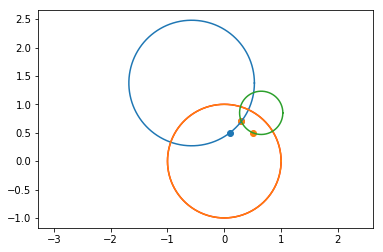

In [0]:
import math
import warnings
warnings.simplefilter('ignore')

v1, v2, v3 = 0.1 + 0.5j , 0.3 + 0.7j, 0.5 + 0.5j

u, v, s = v1, v2, v3

C1_uv, C2_uv = Get_Circle(u, v) 
C1_us, C2_us = Get_Circle(u, s)

c1, c2 = C1_uv, C2_uv
x1_uv, x2_uv = np.roots([1+(c1/c2)**2, 4*c1/c2**2, 4/c2**2 - 1])
y1_uv, y2_uv = -2/c2 - c1/c2*x1_uv, -2/c2 - c1/c2*x2_uv

c1, c2 = C1_us, C2_us
x1_us, x2_us = np.roots([1+(c1/c2)**2, 4*c1/c2**2, 4/c2**2 - 1])
y1_us, y2_us = -2/c2 - c1/c2*x1_us, -2/c2 - c1/c2*x2_us

u, v = (x1_uv, y1_uv), (x2_uv, y2_uv)
s, t = (x1_us, y1_us), (x2_us, y2_us)

def dot(a, b):
  return a[0]*b[0] + a[1]*b[1]

def minus(a, b):
  return (a[0] - b[0], a[1] - b[1])

P = dot(minus(u, v), minus(s, t)) + dot(u, t)*dot(v, s) - dot(u, s)*dot(v, t)
Q = (1 - dot(u, v))**2
R = (1 - dot(s, t))**2

P, Q, R = P.real, Q.real, R.real

angle = math.acos(math.sqrt(P**2/(Q*R)))

print('sharp angle = {} degrees'.format(angle*180/math.pi))

u, v, s = v1, v2, v3
u1, u2 = u.real, u.imag
v1, v2 = v.real, v.imag

fig, ax = plt.subplots()
if (u1*v2 - u2*v1) == 0.0:

  vec = u/abs(u)
  xs = np.linspace(-1, 1, 2000)
  ax.scatter([u.real, v.real], [u.imag, v.imag])
  ax.plot(np.cos(2*np.pi*xs) , np.sin(2*np.pi*xs))
  ax.plot(vec.real*xs, vec.imag*xs)


else:
  C1, C2 = Get_Circle(u, v)

  xs = np.linspace(0, 1, 1000)

  center = (-C1/2, -C2/2)
  radius = np.sqrt((u.real-center[0])**2 + (u.imag - center[1])**2)


  ax.scatter([u.real, v.real], [u.imag, v.imag])
  ax.plot(np.cos(2*np.pi*xs) , np.sin(2*np.pi*xs), color='r')
  ax.plot(center[0] + radius*np.cos(2*np.pi*xs) ,center[1] + radius*np.sin(2*np.pi*xs))

u, v = s, v
u1, u2 = u.real, u.imag
v1, v2 = v.real, v.imag

if (u1*v2 - u2*v1) == 0.0:

  vec = u/abs(u)
  xs = np.linspace(-1, 1, 2000)
  ax.scatter([u.real, v.real], [u.imag, v.imag])
  ax.plot(vec.real*xs, vec.imag*xs)


else:
  C1, C2 = Get_Circle(u, v)

  xs = np.linspace(0, 1, 1000)

  center = (-C1/2, -C2/2)
  radius = np.sqrt((u.real-center[0])**2 + (u.imag - center[1])**2)


  ax.scatter([u.real, v.real], [u.imag, v.imag])
  ax.plot(np.cos(2*np.pi*xs) , np.sin(2*np.pi*xs))
  ax.plot(center[0] + radius*np.cos(2*np.pi*xs) ,center[1] + radius*np.sin(2*np.pi*xs))

ax.axis('equal')
plt.show()

# **Project Info**

Author : Danon Lior

Course : Dynamical Systems